In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt

In [3]:
import os
os.chdir('Downloads')

In [34]:
ad_data = pd.read_csv("Advertising.csv")

In [36]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [38]:
ad_data = ad_data.iloc[:,1:5]

In [40]:
ad_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


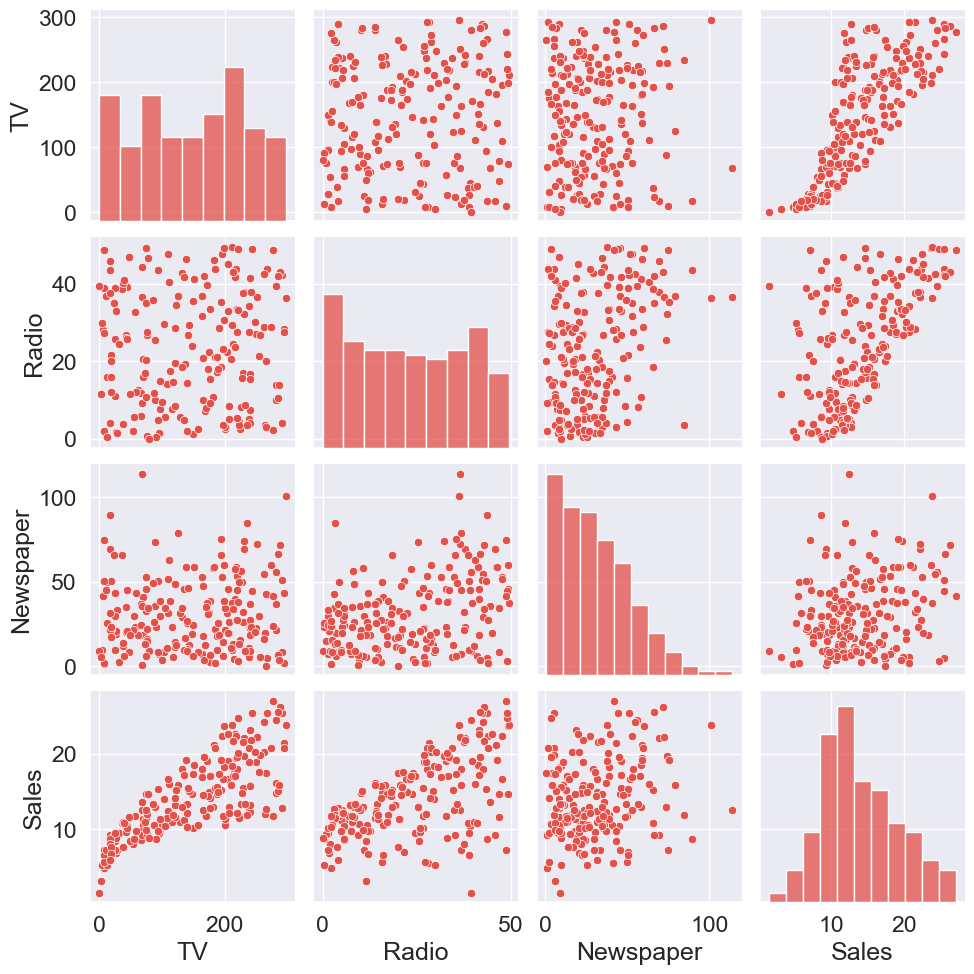

In [42]:
p = sns.pairplot(ad_data)

## Assumptions for Linear Regression

### 1. Linearity

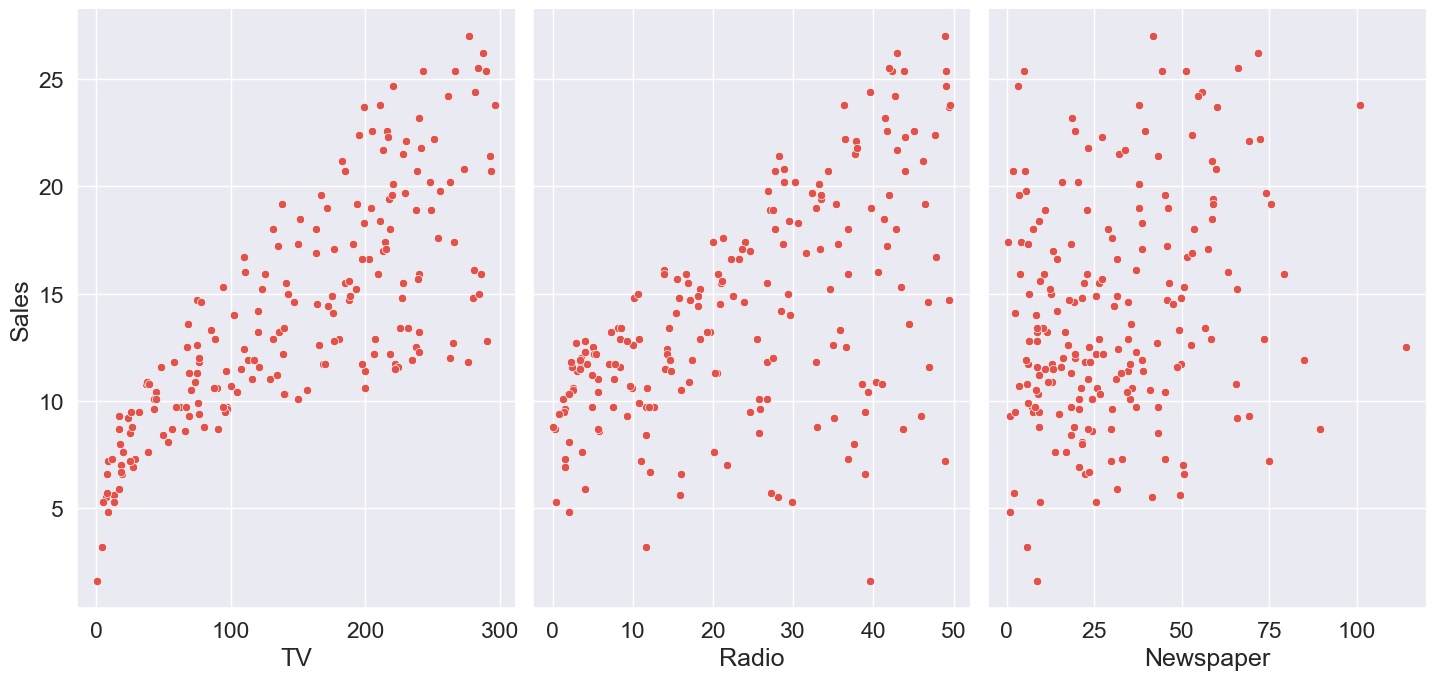

In [46]:
# visualize the relationship between the features and the response using scatterplots
p = sns.pairplot(ad_data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.7)

##### Fitting the linear model

In [51]:
x = ad_data.drop(["Sales"],axis=1)
y = ad_data.Sales

In [53]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0,test_size=0.25)

In [57]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_train)

In [79]:
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=y_pred)))

R squared: 0.9072183330817297


### 2. Mean of Residuals

In [62]:
residuals = y_train.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -6.750155989720952e-16


### 3. Check for Homoscedasticity

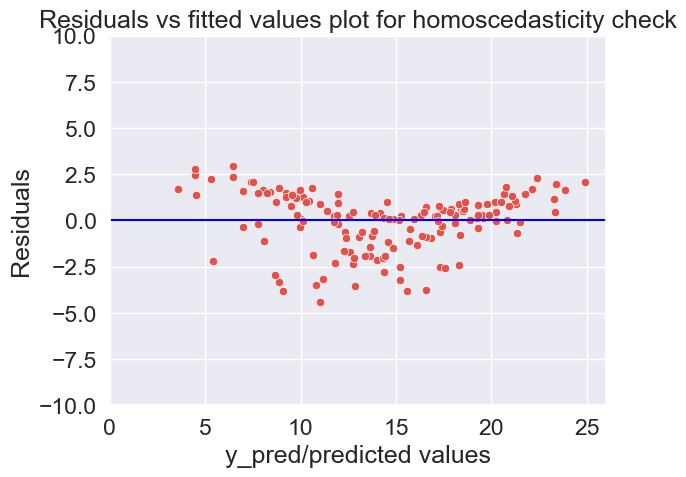

In [85]:
p = sns.scatterplot(x=y_pred,y=residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
p = sns.lineplot(x=[0,26],y=[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

##### Goldfeld Quandt Test

In [88]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X_train)
lzip(name, test)

[('F statistic', 1.1095600395272507), ('p-value', 0.33016677253163296)]

In [92]:
from scipy.stats import bartlett
X_train_column = X_train[:, 0]  # Select the first column of X_train

# Ensure both arrays are 1D
if len(X_train_column.shape) > 1:
    X_train_column = X_train_column.ravel()

if len(residuals.shape) > 1:
    residuals = residuals.ravel()

# Perform Bartlett's test
test = bartlett(X_train_column, residuals)
print(test)

BartlettResult(statistic=30.446105719224807, pvalue=3.43271738037874e-08)


### 4. Check for Normality of error terms/residuals

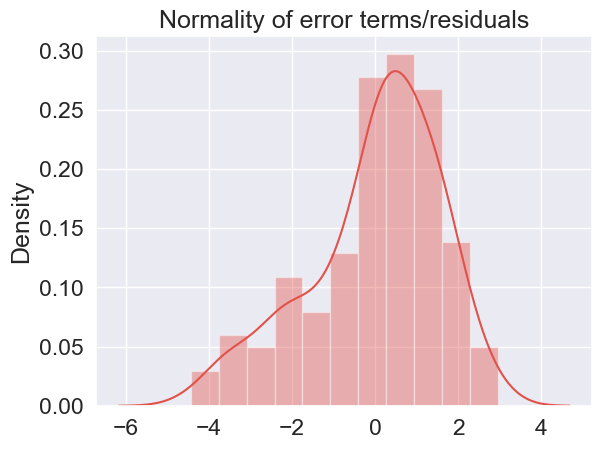

In [95]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

### 5. No autocorrelation of residuals

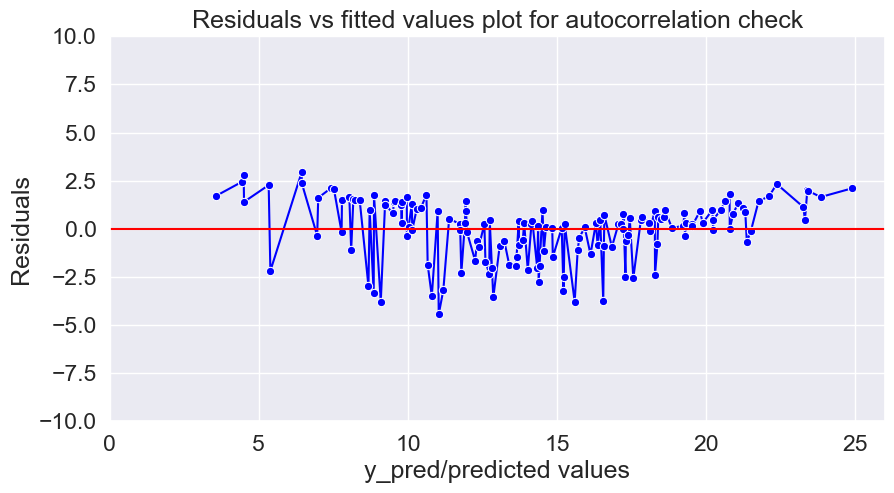

In [100]:
plt.figure(figsize=(10,5))
p = sns.lineplot(x=y_pred,y=residuals,marker='o',color='blue')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
p = sns.lineplot(x=[0,26],y=[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')

In [106]:
from statsmodels.stats import diagnostic as diag
# Perform the Ljung-Box test
ljungbox_result = diag.acorr_ljungbox(residuals, lags=40)

# Get the p-values column by its name
p_values = ljungbox_result['lb_pvalue']

# Get the minimum p-value from the Ljung-Box test results
min_p_value = min(p_values)

print("Minimum p-value:", min_p_value)

Minimum p-value: 0.0084255773399639


In [108]:
import statsmodels.api as sm

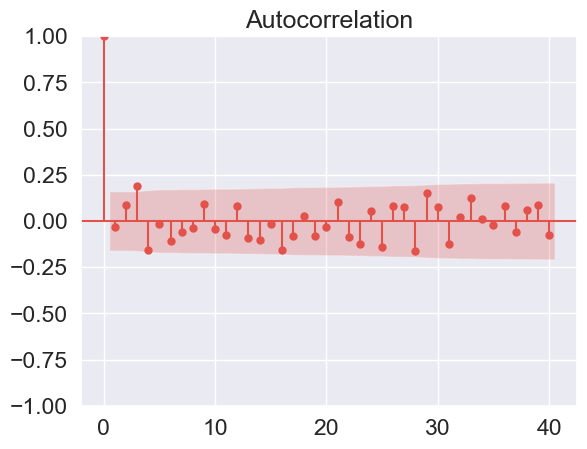

In [110]:
# autocorrelation
sm.graphics.tsa.plot_acf(residuals, lags=40)
plt.show()

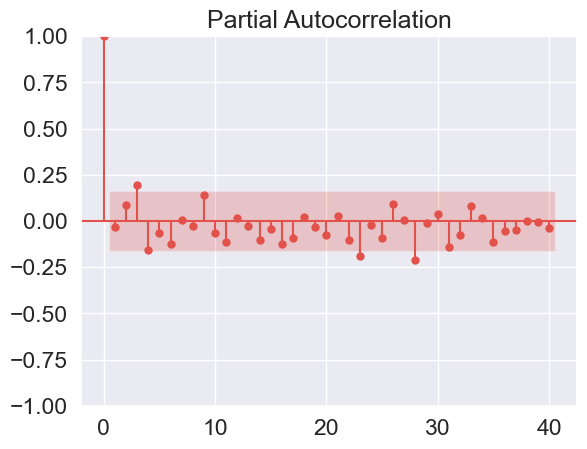

In [112]:
# partial autocorrelation
sm.graphics.tsa.plot_pacf(residuals, lags=40)
plt.show()

### 6. No perfect multicollinearity

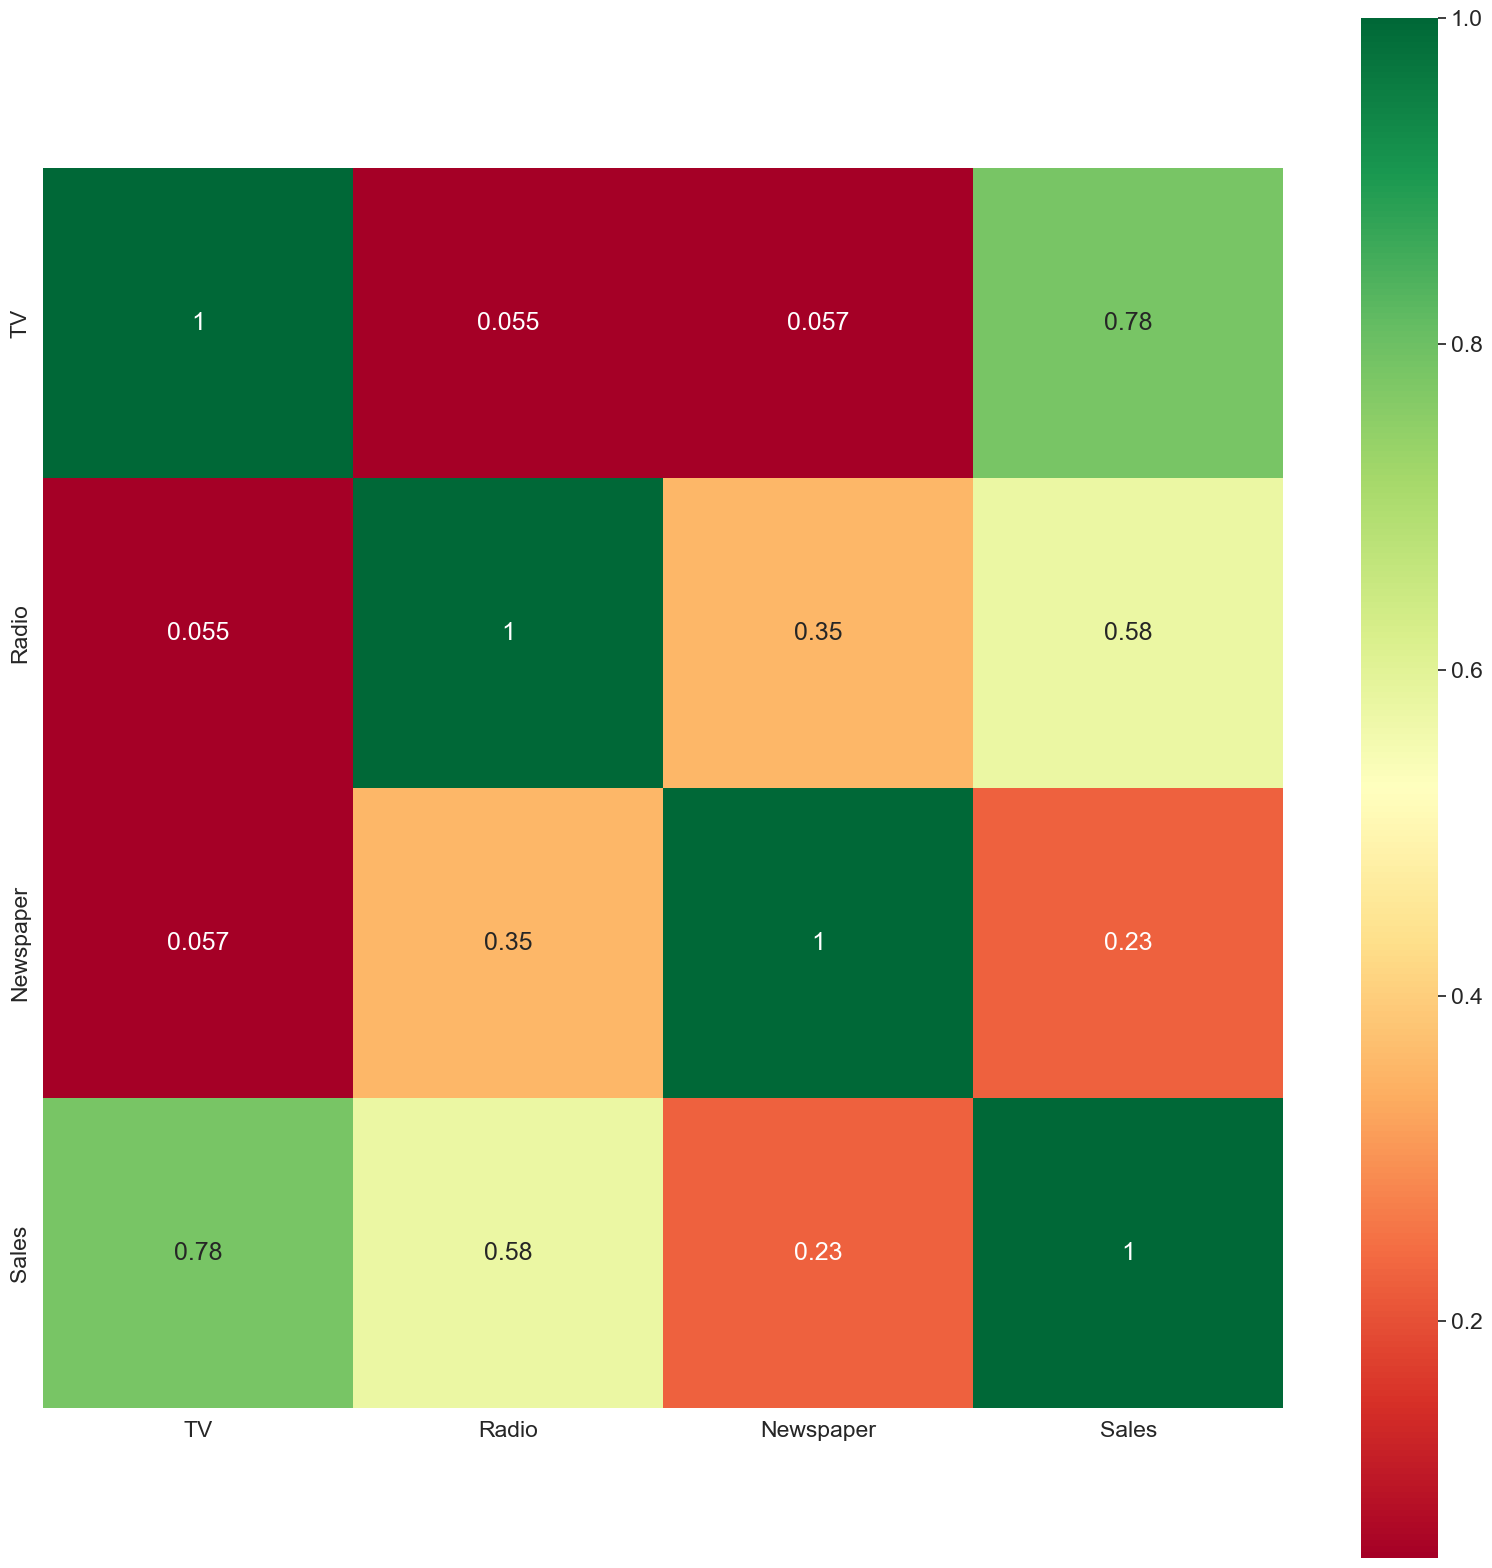

In [115]:
plt.figure(figsize=(20,20))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(ad_data.corr(), annot=True,cmap='RdYlGn',square=True)  # seaborn has very simple solution for heatmap

### 7. Some other model evaluations for fun

In [118]:
from sklearn.tree import DecisionTreeRegressor

dec_tree = DecisionTreeRegressor(random_state=0)
dec_tree.fit(X_train,y_train)
dec_tree_y_pred = dec_tree.predict(X_train)
print("Accuracy: {}".format(dec_tree.score(X_train,y_train)))
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=dec_tree_y_pred)))

Accuracy: 1.0
R squared: 1.0


In [120]:
from sklearn.ensemble import RandomForestRegressor

rf_tree = RandomForestRegressor(random_state=0)
rf_tree.fit(X_train,y_train)
rf_tree_y_pred = rf_tree.predict(X_train)
print("Accuracy: {}".format(rf_tree.score(X_train,y_train)))
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=rf_tree_y_pred)))

Accuracy: 0.9969092330007508
R squared: 0.9969092330007508


In [122]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train,y_train)
svr_y_pred = svr.predict(X_train)
print("Accuracy: {}".format(svr.score(X_train,y_train)))
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=svr_y_pred)))


Accuracy: 0.9259149689639837
R squared: 0.9259149689639837
